In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import torch
import os
import numpy as np
from torchsummary import summary
from torchvision import transforms                                                                                                                                        
from torchvision import models
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600
from PIL import Image
import PIL
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append("../../extra/pytorch-cnn-visualizations/src")
import deep_dream

sys.path.append("../../src/")
sys.path.append("../")
import model
from datasets import imagenet
from utils.function import recreate_image

from layer_activation_with_guided_backprop import GuidedBackprop
from misc_functions import save_gradient_images
from aux.utils import obtain_features_map, load_imgs, zscore, extract_valid
from aux.visualization import visualize_features_map
from aux.visualization import visualize_features_map_for_comparision
from utils.visualizations.visualize import concat_imgs, preprocess_arrays

## Hyperparameters.

## Get Image Path

In [3]:
def main(exp, cnn_layer, filter_pos, class_index, device):
    num_class = 30
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    reverse_mean = [-0.485, -0.456, -0.406]
    reverse_std = [1/0.229, 1/0.224, 1/0.225]
    train_transform = transforms.Compose([                                                                                                                                
        transforms.Resize((224, 224), interpolation=Image.BILINEAR),                                                                                              
        transforms.ToTensor(),                                                                                                                                            
        #transforms.Normalize(mean, std)                                                                                                                                   
           ])         
    trainset = imagenet.ImageNet(root="/media/lincolnzjx/HardDisk/Datasets/", 
                                 is_train=True, transform=train_transform)
    
    trainset.set_data([class_index], num_class)
    imgs_path = []                                                                                                                                                            
    images = []
    labels = []
    for img, label, img_path in trainset:                                                                                                                                     
        images.append(img.unsqueeze(0))                                                                                                                                       
        labels.append(label)                                                                                                                                                  
        imgs_path.append(img_path)  
        
        
    save_dir = "./generated/"
    ################### Hyper-Parameter #######################
    # exp = resume_exp
    # epoch = resume_epoch
    ##########################################################
    ab_path = os.path.join(save_dir, exp)
    
    index2image = {index: item.split("/")[-1].split(".")[0] for index, item in enumerate(imgs_path)}
    index2image
    
    images_cpu = np.array([image.detach().clone().cpu().numpy().squeeze() for image in images])
    
    # Load image
    # ext may be different.
    #optimized_data, valid_imgs_path, valid_imgs_index = load_imgs(ab_path, imgs_path, non_exists_ok=True, ext=".png")
    #valid_imgs, valid_labels = extract_valid(images, labels, valid_imgs_index)
    #optimized_data_zscore = zscore(optimized_data, mean, std)
    images_zscore = zscore(images_cpu, mean, std)
    
    # Move to device
    # opt_image = torch.from_numpy(optimized_data_zscore).to(device)
    original_image = torch.from_numpy(images_zscore).to(device)
    prep_imgs = original_image
    ## Create some need path
    ################### Hyper-Parameter #######################
    # exp = resume_exp
    # epoch = resume_epoch
    ##########################################################
    index2image = {index: item.split("/")[-1].split(".")[0] for index, item 
                   in enumerate(imgs_path)}
    
    
    pretrained_model = models.vgg16(pretrained=True).to(device)
    GBP = GuidedBackprop(pretrained_model) 
    
    dir_path = os.path.join(save_dir, exp)
    if not os.path.exists(dir_path):
        os.mkdir(dir_path)
        
    for prep_img, img_path in zip(prep_imgs, imgs_path):
        prep_img = prep_img.unsqueeze(dim=0)
        prep_img.requires_grad_(True)
        guided_grads = GBP.generate_gradients(prep_img, None, cnn_layer, 
                                              filter_pos)
        
        name = img_path.split("/")[-1].split(".")[0] + ".png"
        file_name_to_export = os.path.join(dir_path, "GuidedBPcolor_" + name)
        save_gradient_images(guided_grads, file_name_to_export)

## Main

### 14

In [4]:
excel_path = "../analysis/week9/Batches.xlsx"
sheet = "Others"
excepts = ["052148"]

In [25]:
xlsx = pd.ExcelFile(excel_path)
excel = pd.read_excel(xlsx, sheet, Sdtype={"exp": str, 
                                           "selected_layer": int,
                                           "selected_filter": int, 
                                           "class_index": int,
                                           "Done": str}).values

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for data in excel:
    exp, selected_layer, selected_filter, class_index, done = data[0], data[1], \
        data[2], data[3], data[4]
    exp = exp.replace("x", "")
    if exp in excepts:
        print("=> Skip")
    else:
        if done == "N":
            print("=> RUN ", exp, selected_layer, selected_filter, 
                  class_index)
            main(exp, selected_layer, selected_filter, class_index, device)
            print("")
            print("-"*50)

NameError: name 'excel_path' is not defined

### 950

In [6]:
excel_path = "../analysis/week9/Batches.xlsx"
sheet = "950"
excepts = ["052148"]

In [7]:
xlsx = pd.ExcelFile(excel_path)
excel = pd.read_excel(xlsx, sheet, Sdtype={"exp": str, 
                                           "selected_layer": int,
                                           "selected_filter": int, 
                                           "class_index": int,
                                           "Done": str}).values

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for data in excel:
    exp, selected_layer, selected_filter, class_index, done = data[0], data[1], \
        data[2], data[3], data[4]
    exp = exp.replace("x", "")
    if exp in excepts:
        print("=> Skip")
    else:
        if done == "N":
            print("=> RUN ", exp, selected_layer, selected_filter, 
                  class_index)
            main(exp, selected_layer, selected_filter, class_index, device)
            print("")
            print("-"*50)

=> RUN  061300 1 16 950
Len of new dataset is :30
(30, 3, 224, 224)

--------------------------------------------------
=> RUN  052490 1 16 950
Len of new dataset is :30
(30, 3, 224, 224)

--------------------------------------------------
=> RUN  7001 1 47 950
Len of new dataset is :30
(30, 3, 224, 224)

--------------------------------------------------
=> RUN  7004 3 28 950
Len of new dataset is :30
(30, 3, 224, 224)

--------------------------------------------------
=> RUN  060490 3 20 950
Len of new dataset is :30
(30, 3, 224, 224)

--------------------------------------------------
=> RUN  7005 6 19 950
Len of new dataset is :30
(30, 3, 224, 224)

--------------------------------------------------
=> RUN  7006 8 99 950
Len of new dataset is :30
(30, 3, 224, 224)

--------------------------------------------------
=> RUN  70071 11 75 950
Len of new dataset is :30
(30, 3, 224, 224)

--------------------------------------------------
=> RUN  70081 13 91 950
Len of new dataset is :3

In [53]:
# model
backbone = "vgg16"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = model.Network(backbone=backbone, num_classes=1000)
net.to(device)
# resume from model
resume = "037-0"
model_dir = "/home/lincolnzjx/Desktop/Interpretation/saved/models"
resume_exp = resume.split("-")[0]
resume_epoch = resume.split("-")[1]
print("Resume from model from exp: {} at epoch {}".format(resume_exp, resume_epoch))
resume_path = os.path.join(model_dir, str(resume_exp), str(resume_epoch))
ckpt = torch.load(resume_path, map_location=device)
net.load_state_dict(ckpt, strict=False) 

Entire model.
Resume from model from exp: 037 at epoch 0


<All keys matched successfully>

In [54]:
selected_layer = 29
selected_filter = 334

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
reverse_mean = [-0.485, -0.456, -0.406]
reverse_std = [1/0.229, 1/0.224, 1/0.225]
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
ori_image = np.expand_dims(ori, axis=0) / 255
images_zscore = zscore(ori_image.astype(np.float32), mean, std)
original_image = torch.FloatTensor(images_zscore).to(device)
prep_imgs = original_image

pretrained_model = models.vgg16(pretrained=True).to(device)
pretrained_model.eval()
GBP = GuidedBackprop(pretrained_model) 

# dir_path = os.path.join(save_dir, exp)
# if not os.path.exists(dir_path):
#     os.mkdir(dir_path)
    
# for prep_img, img_path in zip(prep_imgs, imgs_path):
# print(prep_imgs.shape)
# print(prep_imgs.dtype)
# prep_img = prep_imgs.unsqueeze(dim=0)
prep_img = prep_imgs
prep_img.requires_grad_(True)
guided_grads = GBP.generate_gradients(prep_img, None, selected_layer, selected_filter)

(1, 224, 224, 3)


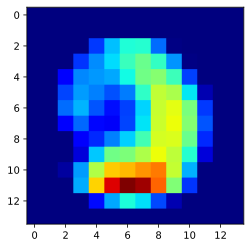

In [55]:
# ori = Image.open("/media/lincolnzjx/HardDisk/Datasets/ilsvrc2012/train/n07747607/n07747607_10061.JPEG").resize((224, 224))
cm = plt.get_cmap("jet")
ori_activation_maps = net.get_activation_maps(torch.FloatTensor(images_zscore).cuda(), selected_layer)
sel_feature_map = ori_activation_maps[0][0,selected_filter]
min_val = sel_feature_map.min()
max_val = sel_feature_map.max()
sel_feature_map -= sel_feature_map.min()
sel_feature_map /= sel_feature_map.max()
plt.imshow(cm(sel_feature_map))

247.99799 0.0


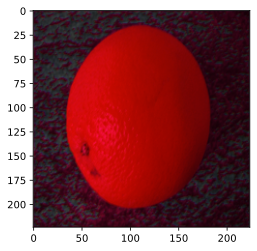

In [41]:
relevance = np.array(guided_grads)
relevance -= relevance.min()
relevance /= relevance.max()
normalized_img = np.array(ori).transpose(2, 0, 1)
relevance_img = normalized_img * relevance
relevance_img = relevance_img.transpose(1,2,0)
print(relevance_img.max(), relevance_img.min())
plt.imshow(relevance_img.astype(np.uint8))
relevance_img = relevance_img.transpose(2,0,1)
# new_image = recreate_image(relevance_img, reverse_mean, reverse_std)
# Image.fromarray(new_image)

### Standarization

1.291374 -1.211569
255 0


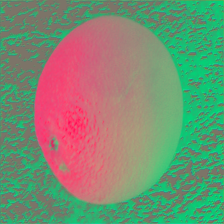

In [22]:
relevance = np.array(guided_grads)
normalized_img = images_zscore[0]
relevance_img = relevance * normalized_img
new_image = recreate_image(relevance_img, reverse_mean, reverse_std)
print(relevance.max(), relevance.min())
print(new_image.max(), new_image.min())
Image.fromarray(new_image)

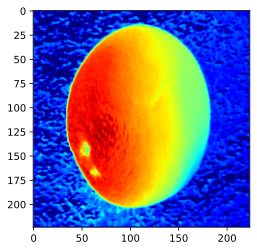

In [38]:
opt_activation_maps = net.get_activation_maps(torch.FloatTensor(relevance_img).unsqueeze(dim=0).cuda(), selected_layer)
opt_sel_feature_map = opt_activation_maps[0][0,selected_filter]
opt_sel_feature_map -= min_val
opt_sel_feature_map = np.maximum(0, opt_sel_feature_map)
opt_sel_feature_map /= opt_sel_feature_map.max()
opt_sel_feature_map = np.minimum(1, opt_sel_feature_map)
plt.imshow(cm(opt_sel_feature_map))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


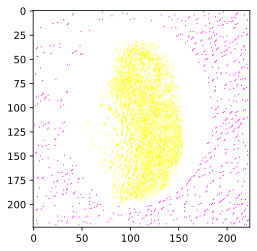

In [40]:
plt.imshow(relevance_img.transpose(1,2,0))

### Remove negative

1.291374 0.0


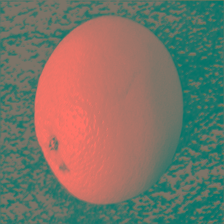

In [12]:
relevance = np.maximum(np.array(guided_grads), 0)
normalized_img = images_zscore[0]
relevance_img = relevance * normalized_img
new_image = recreate_image(relevance_img, reverse_mean, reverse_std)
print(relevance.max(), relevance.min())
Image.fromarray(new_image)

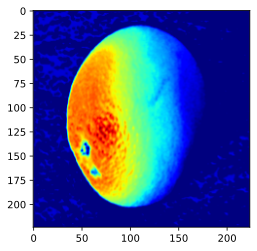

In [13]:
opt_activation_maps = net.get_activation_maps(torch.FloatTensor(relevance_img).unsqueeze(dim=0).cuda(), selected_layer)
opt_sel_feature_map = opt_activation_maps[0][0,selected_filter]
opt_sel_feature_map -= min_val
opt_sel_feature_map = np.maximum(0, opt_sel_feature_map)
opt_sel_feature_map /= opt_sel_feature_map.max()
opt_sel_feature_map = np.minimum(1, opt_sel_feature_map)
plt.imshow(cm(opt_sel_feature_map))

### Scale

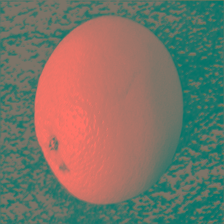

In [14]:
relevance = np.maximum(guided_grads, 0)
relevance -= relevance.min()
relevance /= relevance.max()
normalized_img = images_zscore[0]
new_image = recreate_image(relevance_img, reverse_mean, reverse_std)
Image.fromarray(new_image)

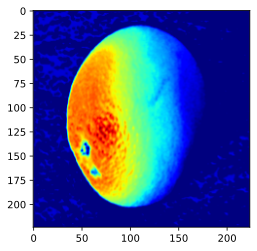

In [15]:
opt_activation_maps = net.get_activation_maps(torch.FloatTensor(relevance_img).unsqueeze(dim=0).cuda(), selected_layer)
opt_sel_feature_map = opt_activation_maps[0][0,selected_filter]
opt_sel_feature_map -= min_val
opt_sel_feature_map = np.maximum(0, opt_sel_feature_map)
opt_sel_feature_map /= opt_sel_feature_map.max()
opt_sel_feature_map = np.minimum(1, opt_sel_feature_map)
plt.imshow(cm(opt_sel_feature_map))

### Total Scale

209 42


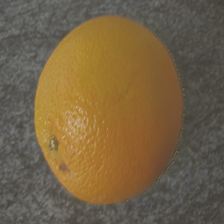

In [48]:
relevance = np.array(guided_grads)
relevance -= relevance.min()
relevance /= relevance.max()
normalized_img = images_zscore[0]
relevance_img = normalized_img * relevance
new_image = recreate_image(relevance_img, reverse_mean, reverse_std)
print(new_image.max(), new_image.min())
Image.fromarray(new_image)

(array([3.00000e+00, 1.30000e+01, 6.40000e+01, 2.04000e+02, 1.20800e+03,
        1.40291e+05, 8.24700e+03, 4.65000e+02, 2.60000e+01, 7.00000e+00]),
 array([-46.207367 , -38.22798  , -30.2486   , -22.269217 , -14.289833 ,
         -6.3104496,   1.6689339,   9.648317 ,  17.6277   ,  25.607084 ,
         33.586468 ], dtype=float32),
 <a list of 10 Patch objects>)

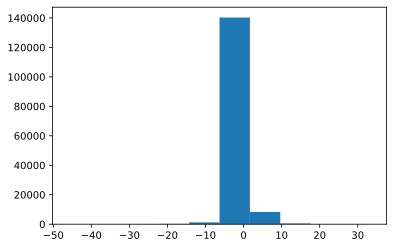

In [57]:
# plt.imshow(guided_grads.transpose(1,2,0))
plt.hist(guided_grads.reshape(-1))

219 70


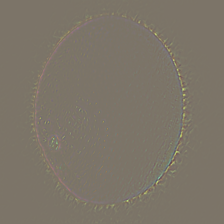

In [58]:
relevance = np.array(guided_grads)
# relevance -= relevance.min()
relevance /= np.abs(relevance.max())
normalized_img = images_zscore[0]
relevance_img = normalized_img * relevance
new_image = recreate_image(relevance_img, reverse_mean, reverse_std)
print(new_image.max(), new_image.min())
Image.fromarray(new_image)

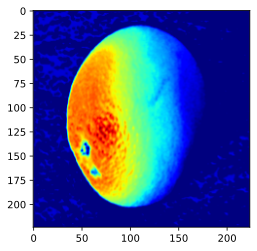

In [17]:
opt_activation_maps = net.get_activation_maps(torch.FloatTensor(relevance_img).unsqueeze(dim=0).cuda(), selected_layer)
opt_sel_feature_map = opt_activation_maps[0][0,selected_filter]
opt_sel_feature_map -= min_val
opt_sel_feature_map = np.maximum(0, opt_sel_feature_map)
opt_sel_feature_map /= opt_sel_feature_map.max()
opt_sel_feature_map = np.minimum(1, opt_sel_feature_map)
plt.imshow(cm(opt_sel_feature_map))

In [20]:
guided_grads.max()

1.291374